# Analyzing Credit Card Data: Insights into Individual Financial Behaviors and Patterns

### 1.Data Cleaning and Preprocessing:

* Identifying and handling missing or incorrect data.
  Removing duplicates.


### Examining the distribution of credit limits, balances, and transaction amounts.
 * Analyzing patterns in transaction frequency and volume over time.
 * Exploring correlations between variables, such as income and spending habits.
 * Segmentation Analysis:

### Analyzing transaction patterns and anomalies to detect potential fraudulent activity.
 * Customer Behavior Analysis:

### Analyzing customer spending patterns, preferences, and trends.
 * Performance Monitoring and Reporting:


In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Import the Pandas,Numpy,Matplotlib,Seaborn libraries using the import statement. Then, it reads the CSV file "credit_record.csv" into a DataFrame named "Ascc" using the pd.read_csv() function provided by Pandas.

In [2]:
# Reading the CSV file "credit_record.csv" into a Pandas DataFrame
Ascc = pd.read_csv("credit_record.csv")

In [3]:
Ascc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [4]:
# Reading the CSV file "application_record.csv" into a Pandas DataFrame
cred_rec = pd.read_csv('application_record.csv')

In [5]:
cred_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
# Merging two DataFrames, "cred_rec" and "Ascc", on the column "ID" with a left join
CC = pd.merge(cred_rec,Ascc, on="ID",how = "left")

Merge two DataFrames, cred_rec and Ascc, using the pd.merge() function provided by Pandas. It specifies the "ID" column as the key for the merge and uses a left join (how="left") to include all records from the cred_rec DataFrame and matching records from the Ascc DataFrame based on the "ID" column. The result is stored in a new DataFrame called CC.

In [7]:
CC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179815 entries, 0 to 1179814
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ID                   1179815 non-null  int64  
 1   CODE_GENDER          1179815 non-null  object 
 2   FLAG_OWN_CAR         1179815 non-null  object 
 3   FLAG_OWN_REALTY      1179815 non-null  object 
 4   CNT_CHILDREN         1179815 non-null  int64  
 5   AMT_INCOME_TOTAL     1179815 non-null  float64
 6   NAME_INCOME_TYPE     1179815 non-null  object 
 7   NAME_EDUCATION_TYPE  1179815 non-null  object 
 8   NAME_FAMILY_STATUS   1179815 non-null  object 
 9   NAME_HOUSING_TYPE    1179815 non-null  object 
 10  DAYS_BIRTH           1179815 non-null  int64  
 11  DAYS_EMPLOYED        1179815 non-null  int64  
 12  FLAG_MOBIL           1179815 non-null  int64  
 13  FLAG_WORK_PHONE      1179815 non-null  int64  
 14  FLAG_PHONE           1179815 non-null  int64  
 15

This .isna() method to create a boolean mask indicating missing values in the DataFrame CC, and then applies the .sum() method to sum up the missing values for each column. The result will show the count of missing values in each column of the DataFrame 

In [8]:
# Checking for missing values in the DataFrame "CC" and summing them up
CC.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        362928
CNT_FAM_MEMBERS             0
MONTHS_BALANCE         402100
STATUS                 402100
dtype: int64

This line of code is checking for duplicated values in the "ID" column of the DataFrame CC

In [9]:
CC["ID"].duplicated().sum()

741305

dropna(): This method is used to remove rows with missing values (NaNs) from the DataFrame.

In [10]:
CC.dropna(inplace=True)

In [11]:
CC

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0.0,C
32,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-1.0,C
33,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-2.0,C
34,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-3.0,C
35,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176066,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9.0,0
1176067,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10.0,2
1176068,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11.0,1
1176069,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12.0,0


In [12]:
#Again we will check duplicate values.
CC["ID"].duplicated().sum()

512533

In [13]:
CC

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0.0,C
32,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-1.0,C
33,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-2.0,C
34,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-3.0,C
35,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176066,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9.0,0
1176067,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10.0,2
1176068,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11.0,1
1176069,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12.0,0


In [14]:
#head(60): This method retrieves the first 60 rows of the DataFrame CC. By default, head() returns the first 5 rows.
CC.head(60)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0.0,C
32,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-1.0,C
33,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-2.0,C
34,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-3.0,C
35,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-4.0,C
36,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-5.0,C
37,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-6.0,C
38,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-7.0,X
39,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-8.0,0
40,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-9.0,0


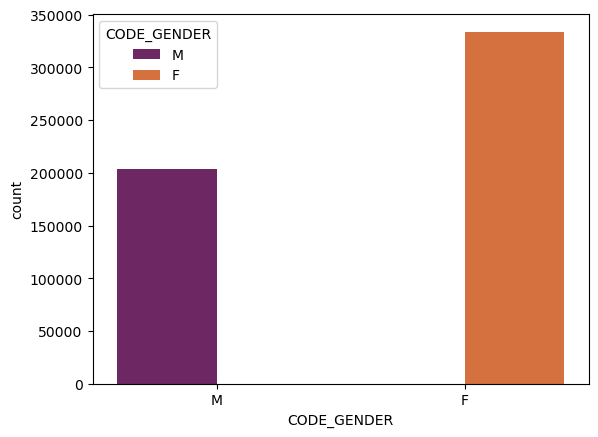

In [15]:
# Creating a count plot for the 'CODE_GENDER' column with hue based on 'CODE_GENDER' itself
sns.countplot(data=CC, x='CODE_GENDER', hue='CODE_GENDER', palette='inferno')
# Displaying the plot
plt.show()

In [16]:
#This line of code returns the column names of the DataFrame CC:
CC.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS'],
      dtype='object')

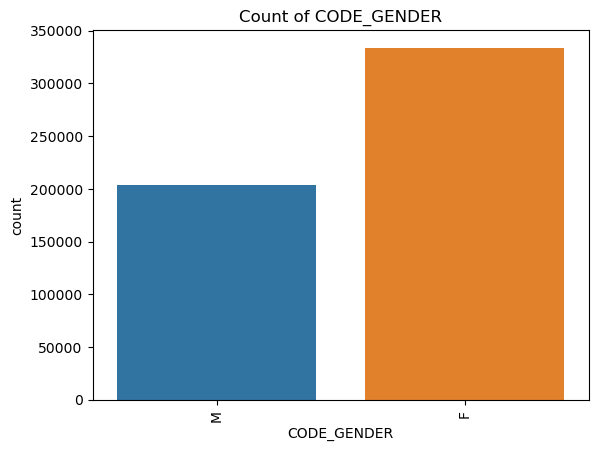

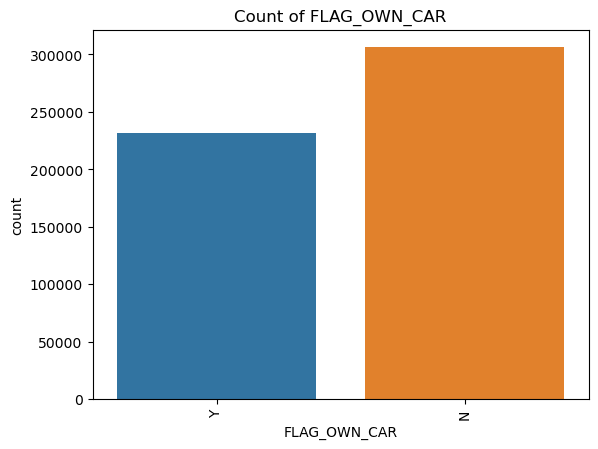

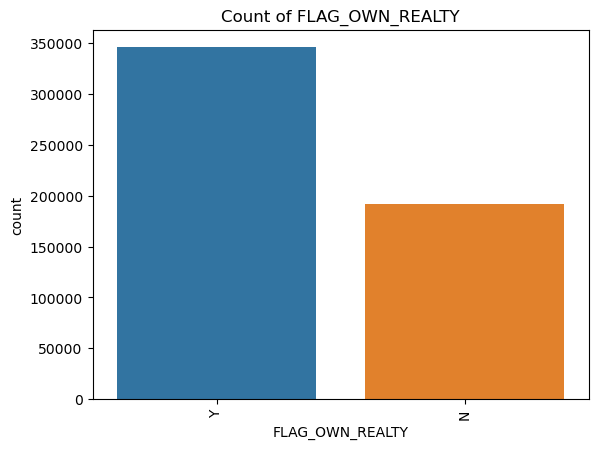

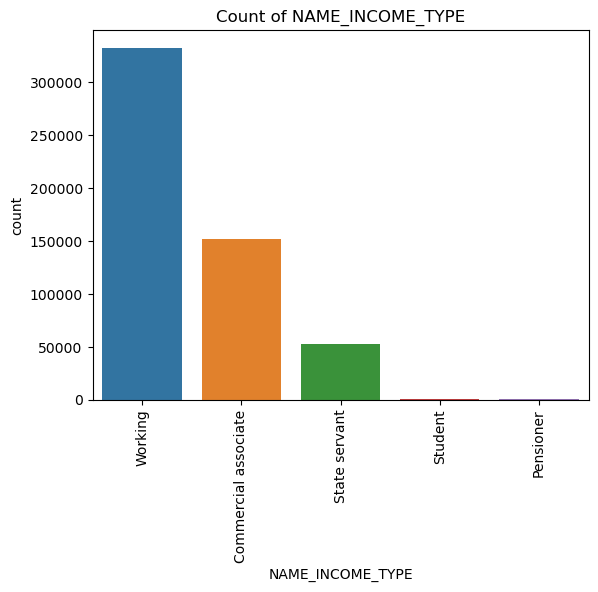

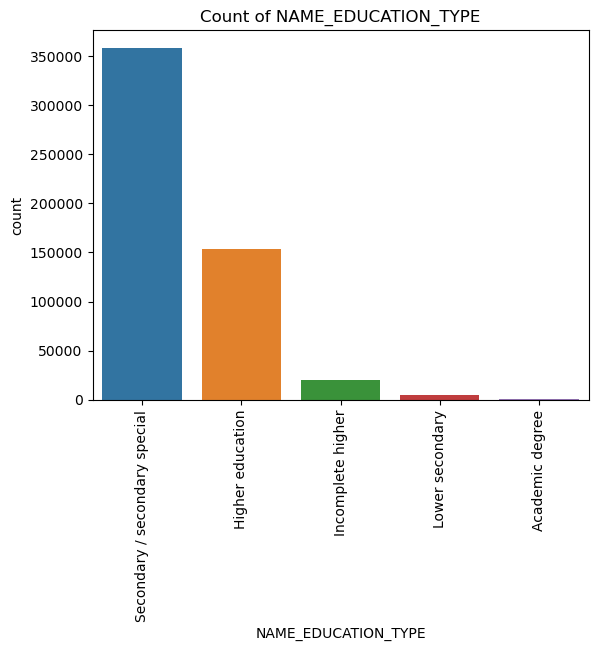

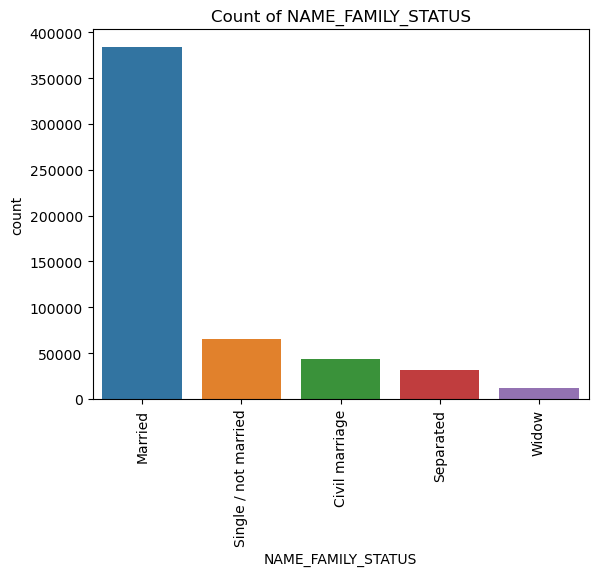

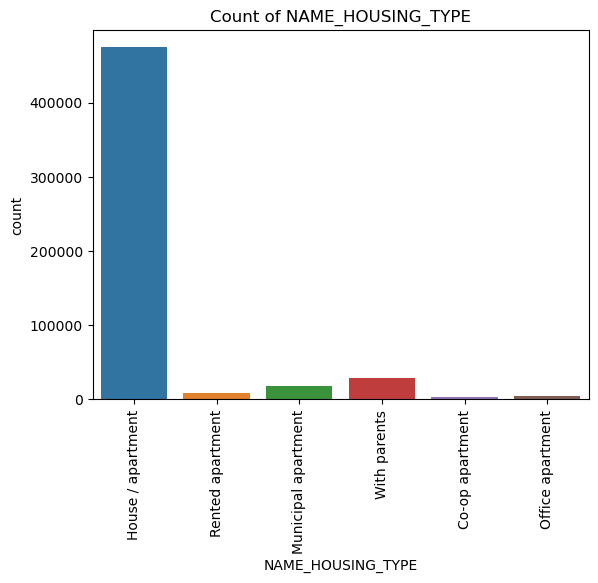

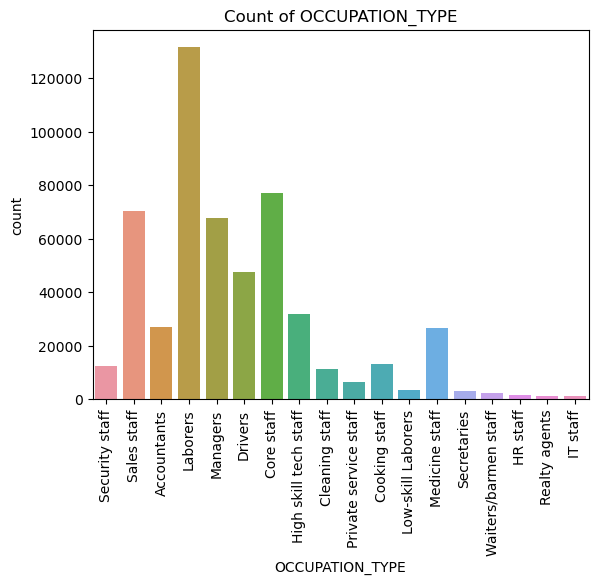

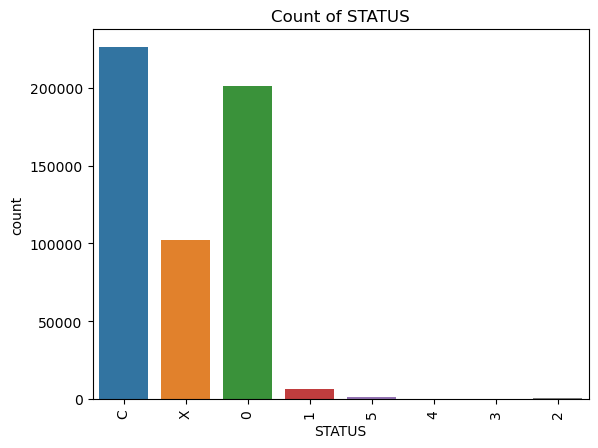

In [20]:
# Loop through each column in the DataFrame CC
for i in CC.columns:                                
        if CC[i].dtype == 'object':# Check if the data type of the column is 'object', indicating a categorical variable
            sns.countplot(data=CC, x=i)# Create a count plot for the categorical variable using seaborn
        # Rotate x-axis labels by 90 degrees to prevent overlapping
            plt.xticks(rotation=90)
            plt.title('Count of '+i)
        # Display the plot
            plt.show()

1.The histogram is created using Seaborn's histplot() function.
2.This graph will show the distribution of the "OCCUPATION_TYPE" variable from the DataFrame CC using a histogram. 
3.Each bar in the histogram represents a different occupation type, and the height of each bar indicates the frequency or count of individuals associated with that occupation type.


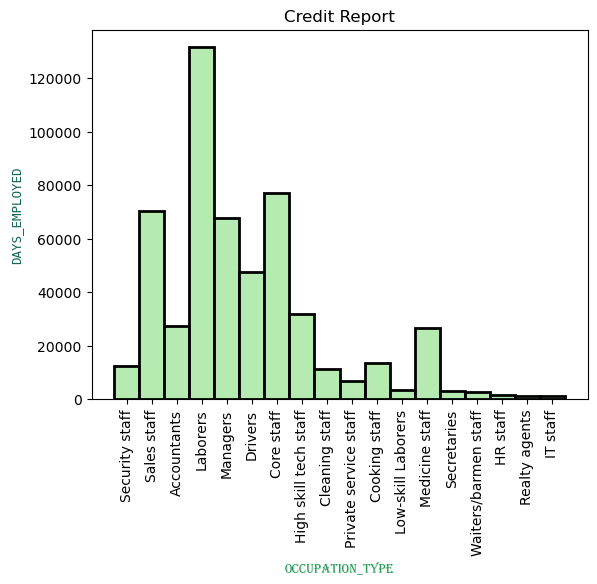

In [22]:

sns.histplot(CC["OCCUPATION_TYPE"], label="Credit Report", linewidth=2, color='#9DE496')
plt.xlabel("OCCUPATION_TYPE", fontname="ALGERIAN", fontsize=9, color="#229954")
plt.ylabel("DAYS_EMPLOYED", fontname="Monospace", fontsize=9, color="#0E6655")
plt.xticks(rotation=90)
plt.title("Credit Report")
plt.show()

This plot will create a scatter plot to visualize the relationship between the "NAME_INCOME_TYPE" and "MONTHS_BALANCE" variables from the DataFrame CC, with the points colored by the "CODE_GENDER" variable.

This plot generates a scatter plot using Seaborn to visualize the relationship between the "NAME_INCOME_TYPE" and "MONTHS_BALANCE" variables from the DataFrame CC, with the points colored by the "CODE_GENDER" variable.

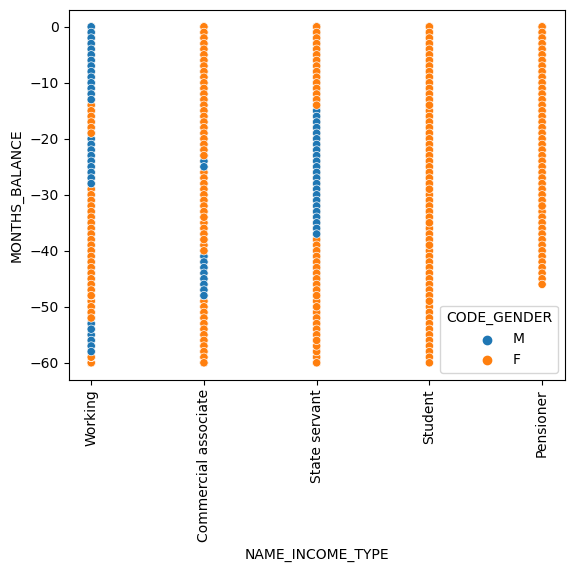

In [24]:

sns.scatterplot(x="NAME_INCOME_TYPE", y="MONTHS_BALANCE", hue="CODE_GENDER", data=CC)
plt.xticks(rotation=90)
plt.show()

This code  iterates over each unique value in the "OCCUPATION_TYPE" column of the DataFrame CC. For each unique occupation type, it calculates the mean value of the "AMT_INCOME_TOTAL" column and prints it. Additionally, it appends the occupation type and the corresponding mean income to the lists Occupation and total_income, respectively.

In [26]:
Occupation=[]
total_income = []
for i in CC["OCCUPATION_TYPE"].unique():
    z = CC[CC["OCCUPATION_TYPE"] == i]["AMT_INCOME_TOTAL"].mean()
    print(f"Total_income--{i}:{round(z,2)}")
    Occupation.append(i)
    total_income.append(round(z,2))

Total_income--Security staff:177341.37
Total_income--Sales staff:174878.41
Total_income--Accountants:207761.51
Total_income--Laborers:181708.2
Total_income--Managers:281714.0
Total_income--Drivers:208968.93
Total_income--Core staff:191917.62
Total_income--High skill tech staff:197953.89
Total_income--Cleaning staff:149095.95
Total_income--Private service staff:205473.19
Total_income--Cooking staff:144189.41
Total_income--Low-skill Laborers:127543.89
Total_income--Medicine staff:167347.39
Total_income--Secretaries:163206.1
Total_income--Waiters/barmen staff:153756.75
Total_income--HR staff:196705.52
Total_income--Realty agents:243075.0
Total_income--IT staff:223593.71


This code segment creates a bar plot to visualize the mean income for each unique occupation type in the Occupation list, with corresponding mean incomes stored in the total_income list. The bars are colored using a custom list of colors provided in the colors list.

Text(0.5, 1.0, 'Overall_income')

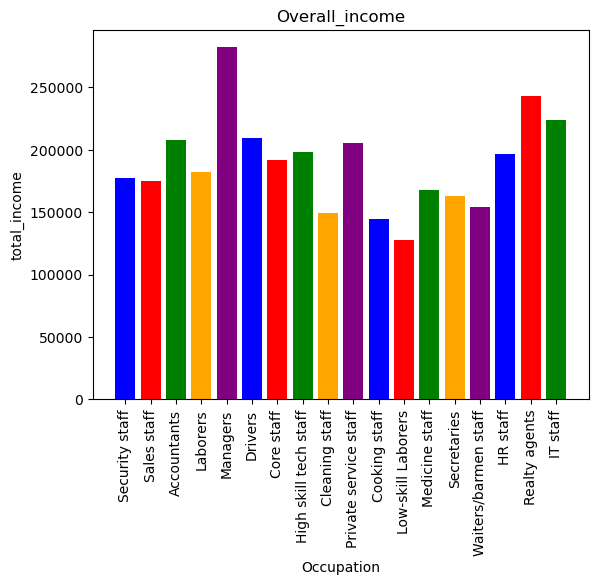

In [27]:
colors=["blue","red","green","orange","purple"]
plt.bar(Occupation,total_income,color=colors)
plt.xticks(rotation=90)
plt.xlabel("Occupation")
plt.ylabel("total_income")
plt.title("Overall_income")

This code iterates over each unique value in the "NAME_HOUSING_TYPE" column of the DataFrame CC. For each unique housing type, it calculates the mean value of the "CNT_FAM_MEMBERS" column and prints it. Additionally, it appends the housing type and the corresponding mean family members count to the lists Housing_type and Family_member, respectively.

In [28]:
Housing_type =[]
Family_member = []
for i in CC["NAME_HOUSING_TYPE"].unique():
    v = CC[CC["NAME_HOUSING_TYPE"] == i]["CNT_FAM_MEMBERS"].mean()
    print(f"Total_number_of_type--{i}:{round(v,2)}")
    Housing_type.append(i)
    Family_member.append(round(v,2))

Total_number_of_type--House / apartment:2.31
Total_number_of_type--Rented apartment:2.02
Total_number_of_type--Municipal apartment:2.26
Total_number_of_type--With parents:2.35
Total_number_of_type--Co-op apartment:2.14
Total_number_of_type--Office apartment:2.41


This code segment creates a bar plot to visualize the mean family member count for each unique housing type in the Housing_type list, with corresponding mean family member counts stored in the Family_member list. The bars are colored using a custom list of colors provided in the colors list.

Text(0.5, 1.0, 'Total family member')

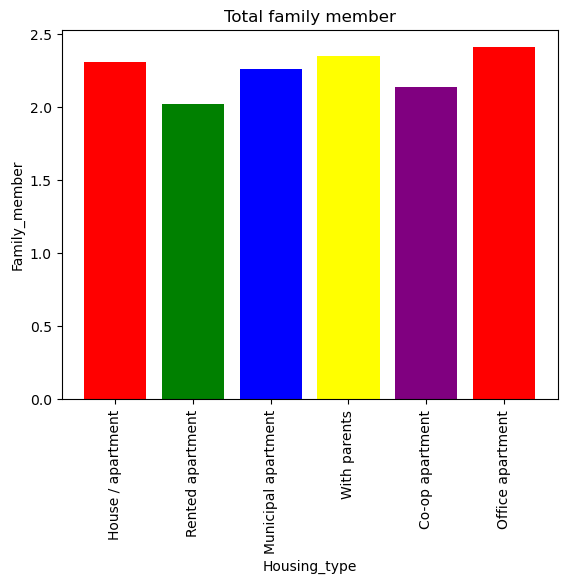

In [29]:
colors=["red","green","blue","yellow","purple"]
plt.bar(Housing_type,Family_member,color=colors)
plt.xticks(rotation=90)
plt.xlabel("Housing_type")
plt.ylabel("Family_member")
plt.title("Total family member")

This code snippet iterates over each unique value in the "OCCUPATION_TYPE" column of the DataFrame CC. For each unique occupation type, it calculates the mean value of the flags "FLAG_MOBIL", "FLAG_WORK_PHONE", and "FLAG_EMAIL". Then, it appends the occupation type and the corresponding mean flags to the lists Occupation and All_flag, respectively. Additionally, it prints the mean flags for each occupation type.

In [30]:
Occupation = []
All_flag = []

for occupation_type in CC["OCCUPATION_TYPE"].unique():
    subset = CC[CC["OCCUPATION_TYPE"] == occupation_type]
    mean_flags = subset[["FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_EMAIL"]].mean()
    Occupation.append(occupation_type)
    All_flag.append(round(mean_flags, 2))
    print(f"All_over_Progress--{i}:{round(mean_flags,2)}")

All_over_Progress--Office apartment:FLAG_MOBIL         1.00
FLAG_WORK_PHONE    0.23
FLAG_EMAIL         0.12
dtype: float64
All_over_Progress--Office apartment:FLAG_MOBIL         1.00
FLAG_WORK_PHONE    0.27
FLAG_EMAIL         0.09
dtype: float64
All_over_Progress--Office apartment:FLAG_MOBIL         1.00
FLAG_WORK_PHONE    0.30
FLAG_EMAIL         0.13
dtype: float64
All_over_Progress--Office apartment:FLAG_MOBIL         1.00
FLAG_WORK_PHONE    0.28
FLAG_EMAIL         0.07
dtype: float64
All_over_Progress--Office apartment:FLAG_MOBIL         1.00
FLAG_WORK_PHONE    0.29
FLAG_EMAIL         0.12
dtype: float64
All_over_Progress--Office apartment:FLAG_MOBIL         1.00
FLAG_WORK_PHONE    0.29
FLAG_EMAIL         0.09
dtype: float64
All_over_Progress--Office apartment:FLAG_MOBIL         1.00
FLAG_WORK_PHONE    0.29
FLAG_EMAIL         0.13
dtype: float64
All_over_Progress--Office apartment:FLAG_MOBIL         1.00
FLAG_WORK_PHONE    0.29
FLAG_EMAIL         0.13
dtype: float64
All_over_Progres

This code segment creates a stacked bar plot to visualize the mean values of the flags "FLAG_MOBIL", "FLAG_WORK_PHONE", and "FLAG_EMAIL" for each unique occupation type in the Occupation list, with corresponding mean flag values stored in the All_flag list.

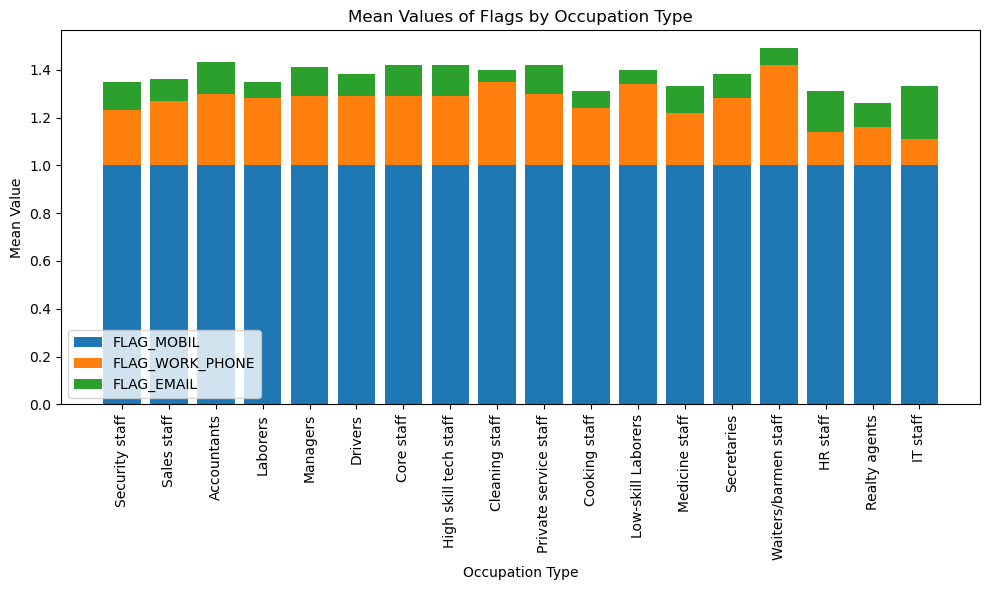

In [31]:
plt.figure(figsize=(10, 6))
plt.bar(Occupation, [flag["FLAG_MOBIL"] for flag in All_flag], label="FLAG_MOBIL")
plt.bar(Occupation, [flag["FLAG_WORK_PHONE"] for flag in All_flag], bottom=[flag["FLAG_MOBIL"] for flag in All_flag], label="FLAG_WORK_PHONE")
plt.bar(Occupation, [flag["FLAG_EMAIL"] for flag in All_flag], bottom=[flag["FLAG_MOBIL"] + flag["FLAG_WORK_PHONE"] for flag in All_flag], label="FLAG_EMAIL")

plt.xlabel('Occupation Type')
plt.ylabel('Mean Value')
plt.title('Mean Values of Flags by Occupation Type')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

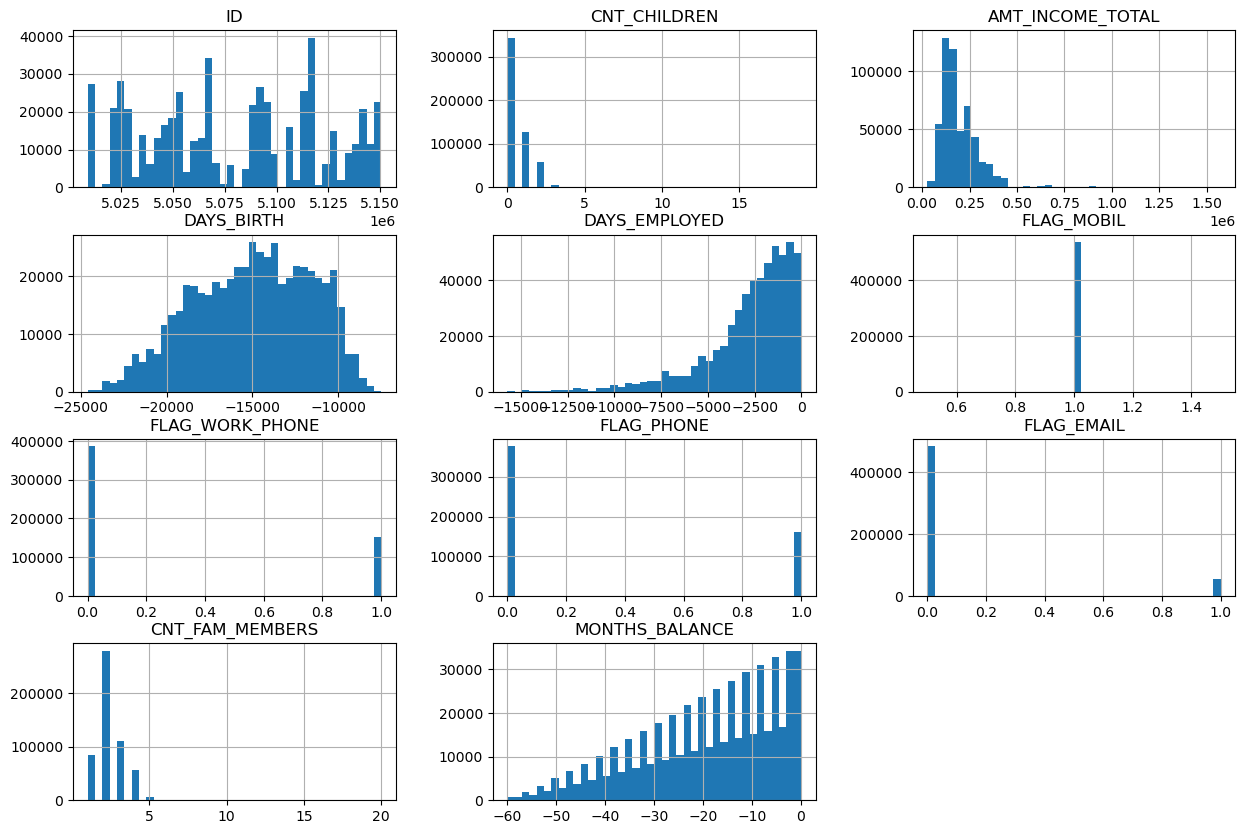

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0')])

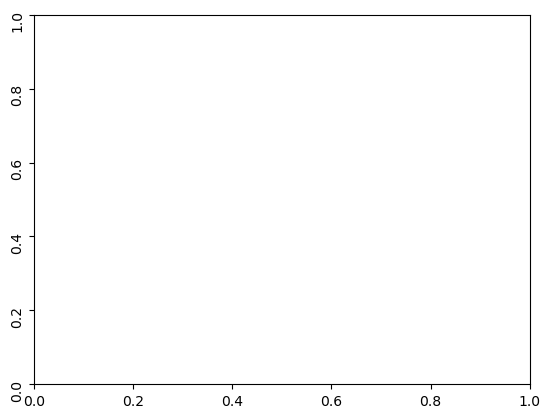

In [32]:
CC.hist(bins=40, figsize=(15, 10))  # Create histograms for each numerical column in CC with 40 bins and a figure size of (15, 10)
plt.show()  # Display the histograms
plt.yticks(rotation=90)  # Rotate y-axis labels by 90 degrees

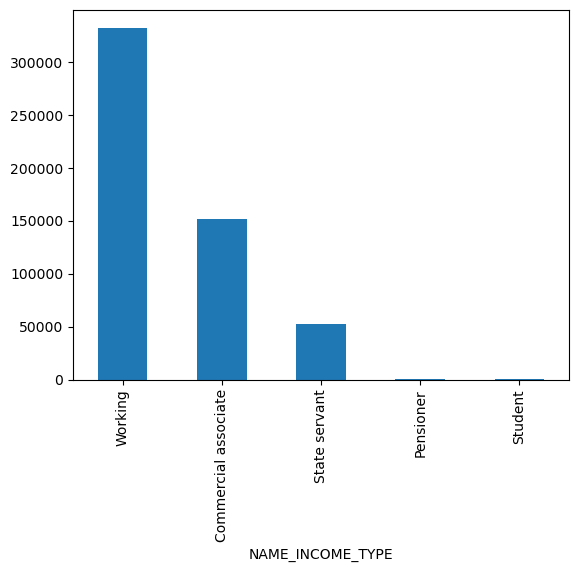

In [33]:
CC["NAME_INCOME_TYPE"].value_counts().plot(kind="bar")  # Create a bar plot of value counts for each category in the "NAME_INCOME_TYPE" column
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees for better readability
plt.show()  # Display the plot